In [1]:
import pandas as pd
import seaborn as sns
import mta_functions
from mta_plots import hourlyLinePlots

Retrieve Top Stations

In [2]:
# Load processed mta data pickle file
mta_data = pd.read_pickle('../dump/mta_data_processed')

In [3]:
# Group traffic values by station and date
top_traffic_stations_df = mta_data.groupby(['STATION','DATE','WEEKDAY'], as_index=False).TRAFFIC.sum().sort_values('TRAFFIC', ascending=False)

In [4]:
# Create pivots tables
top_traffic_stations_wide = mta_data.groupby(['STATION','DATE'], as_index=False).TRAFFIC.sum().sort_values('TRAFFIC', ascending=False).pivot("DATE", "STATION", "TRAFFIC")

In [5]:
# Generate list of top stations
top_stations_list = mta_functions.topStations(top_traffic_stations_wide, 10)

In [6]:
# Filter by stations with top counts
top_traffic_stations_df = top_traffic_stations_df[top_traffic_stations_df.STATION.isin(top_stations_list)]

Weekly Averages by Station

In [7]:
top_traffic_stations_weekday_average = top_traffic_stations_df.groupby(['STATION','WEEKDAY'], as_index=False).TRAFFIC.mean().sort_values('TRAFFIC', ascending=False)

In [8]:
# Sort by weekday
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
wc = pd.CategoricalDtype(categories=weekdays, ordered=True)
top_traffic_stations_weekday_average['WEEKDAY'] = top_traffic_stations_weekday_average['WEEKDAY'].astype(wc)

In [9]:
top_stations_weekday_averages_wide = top_traffic_stations_weekday_average.pivot("WEEKDAY", "STATION", "TRAFFIC")

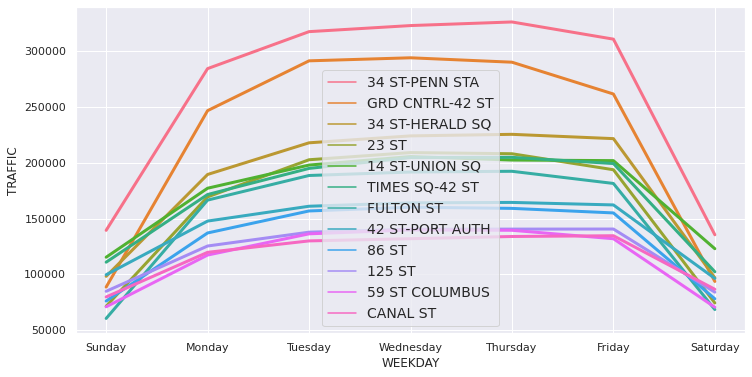

In [18]:
top_stations_weekly_averages = sns.lineplot(data=top_traffic_stations_weekday_average, linewidth = 3, x="WEEKDAY", y="TRAFFIC", hue="STATION")
top_stations_weekly_averages.legend(fontsize='14')
sns.set(rc={'figure.figsize':(12,6)})
# top_stations_weekly_averages.get_figure().savefig('../svg/top_stations_weekly_averages.svg', format='svg')

Retrieve POI Stations

In [11]:
poi_list = ['116 ST-COLUMBIA','14 ST','34 ST-PENN STA','5 AVE','68ST-HUNTER CO','ASTOR PL','CANAL ST','CORTLANDT ST','JAY ST-METROTEC']
poi_stations_df = mta_data[mta_data.STATION.isin(poi_list)]
poi_stations_df = poi_stations_df.groupby(['STATION','DATE','WEEKDAY'], as_index=False).TRAFFIC.sum().sort_values('TRAFFIC', ascending=False)

In [12]:
targets_df = poi_stations_df[poi_stations_df.STATION.isin(top_stations_list)]

Line Plots for select Stations

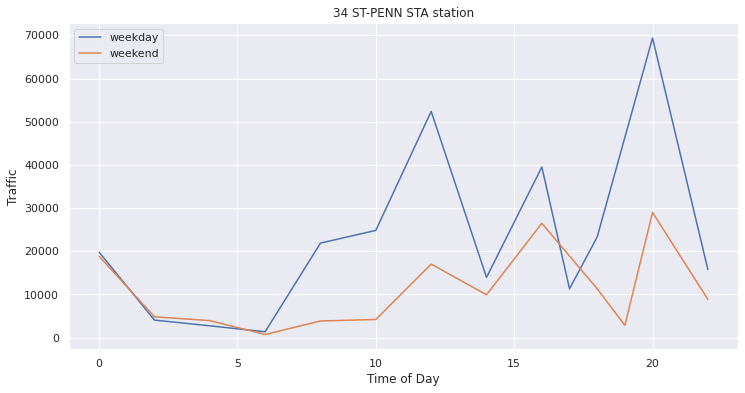

In [13]:
hourlyLinePlots(mta_data, '34 ST-PENN STA')

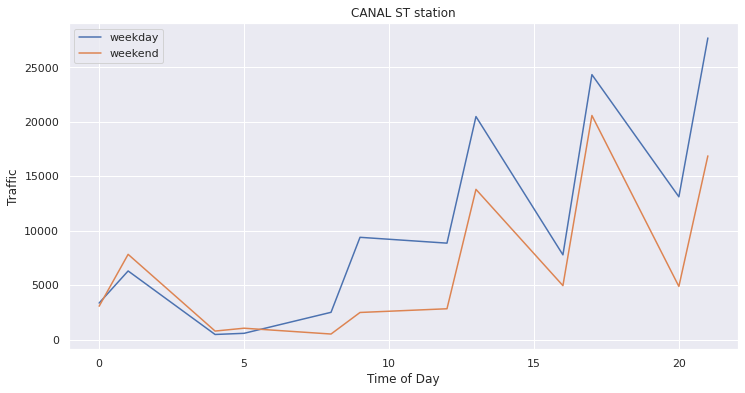

In [14]:
hourlyLinePlots(mta_data, 'CANAL ST')

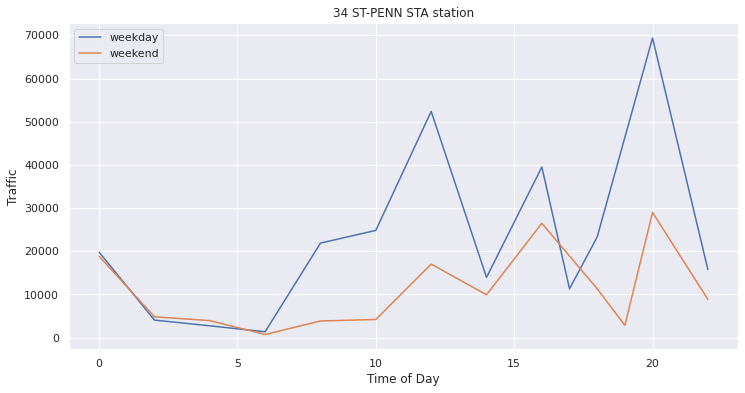

In [15]:
hourlyLinePlots(mta_data, '34 ST-PENN STA')

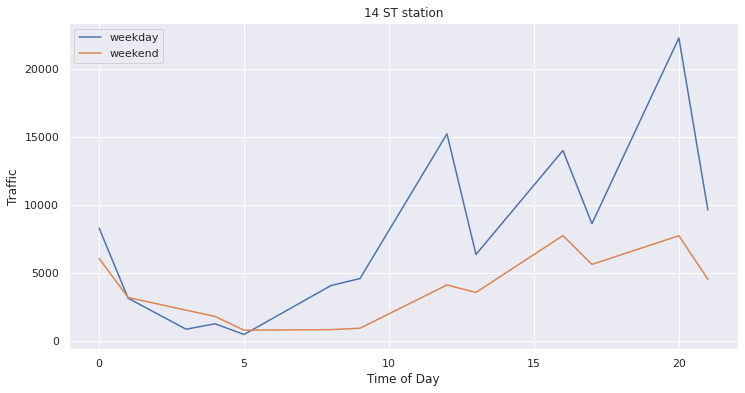

In [16]:
hourlyLinePlots(mta_data, '14 ST')

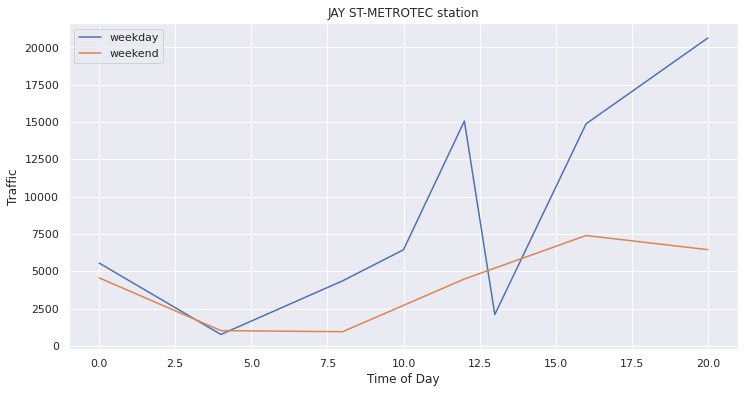

In [17]:
hourlyLinePlots(mta_data, 'JAY ST-METROTEC')